<a href="https://colab.research.google.com/github/LeonardoAAugusto/Projeto/blob/main/ALTERNATIVA%20PARA%20OPENCV%20-%20YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALTERNATIVA PARA OPENCV PYTOHN - YOLO

Detecção de Formas Geométricas com YOLO

Instalando e Importando Bibliotecas

In [3]:
!pip install ultralytics opencv-python numpy
!pip install ultralytics
!pip install matplotlib
from ultralytics import YOLO
import cv2
import torch
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Criação e configuração de dataset**

Como os arquivos de imagem estão dentro de uma pasta no google drive, as seguintes configurações foram necessarias.

Pedindo acesso ao Google Drive para acessar o dataset



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Acessar os arquivos do Google Drive

In [5]:
import os

# Listar o conteúdo do Google Drive
drive_path = "/content/drive/MyDrive"
print("Conteúdo do MyDrive:", os.listdir(drive_path))

Conteúdo do MyDrive: ['Valores Gastos na Campanha de Google 1 10 21 a 31 10 21.gsheet', 'Relatório de Campanha - Dr. Luís Fêo.gsheet', 'Relatorio Padrão.gsheet', 'Relatorio Padrão Atualizado.gsheet', 'ANALISE DE PESQUISAS - LINK ENSINA - 27 04 22.gsheet', 'PLANEJAMENTO DE MÃO DE OBRA DE CURSOS - LINK ENSINA.gsheet', 'Keyword Forecasts 2022-09-08 at 13_32_54.gsheet', 'Keyword Forecasts 2022-09-08 at 14_16_31.gsheet', 'Agência GT - Leonardo Augusto .gdoc', 'PLANILHAS DE CRIATIVOS PARA OPERAÇÃO.gsheet', 'ESCRITAS DE PAGINAS DE VENDAS.gdoc', 'PUBLICOS DE GOOGLE YOUTUBE PARA ANUNCIOS .gsheet', 'CALENDARIO DE CONTEÚDO [JUNHO].gsheet', 'Débora Estevam', 'PROJETO FINAL - DIAC - RELATORIO.gsheet', 'JÉSSICA PIRES', 'JORDAN PESSOA', 'KATIA EVANS', 'RHUAN BRODY', 'RICARDO DUARTE', 'Curso Gratuito  - Alfabetize rápido (respostas).gsheet', 'Formulário sem título.gform', 'LEADS PARA DISPAROS NO WHATSAPP.gsheet', 'PLANO PARA LANÇAR PRODUTO.gdoc', 'LEADS DA AGENCIA  FISIO .gsheet', 'Doc

Verificar estrutura do dataset

O dataset aqui usado é uma versão reduzida da original, no qual pode ser encontrada nesse link: https://www.kaggle.com/datasets/dineshpiyasamara/geometric-shapes-dataset?resource=download

In [6]:
dataset_path = "/content/drive/MyDrive/geometricshapesdataset"
if os.path.exists(dataset_path):
    print("Estrutura do dataset:")
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):  # Garante que é uma pasta
            print(f"- {folder}: {len(os.listdir(folder_path))} imagens")
else:
    print("Erro: O dataset não foi encontrado! Verifique o caminho.")

Estrutura do dataset:
- Triangle: 100 imagens
- Square: 100 imagens
- Circle: 100 imagens


Estrutura do Dataset para YOLO

O próximo passo é organizar o dataset no formato esperado pelo YOLO. Como tem 100 imagens para cada categoria (círculo, quadrado, triângulo), o YOLO espera as imagens em um formato específico. O dataset precisa ter:

Uma pasta images com todas as imagens (divididas em subpastas para treino e validação).
Uma pasta labels com os arquivos de rótulos no formato YOLO (arquivos .txt com as coordenadas de bounding box para cada objeto).

In [8]:
import os
import shutil

# Caminho do dataset
dataset_path = "/content/drive/MyDrive/geometricshapesdataset"
output_path = "/content/drive/MyDrive/geometricshapesdataset_yolo"

# Definindo os diretórios de treino e validação
train_path = os.path.join(output_path, 'images/train')
val_path = os.path.join(output_path, 'images/val')
train_labels_path = os.path.join(output_path, 'labels/train')
val_labels_path = os.path.join(output_path, 'labels/val')

# Criando as pastas necessárias
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

# Definindo as classes de figuras (0: círculo, 1: quadrado, 2: triângulo)
class_names = ["Circle", "Square", "Triangle"]

# Função para mover as imagens e gerar os rótulos
def process_images_and_labels():
    # Listando as pastas das figuras
    for class_name in class_names:
        image_folder = os.path.join(dataset_path, class_name)

        # Listando as imagens na pasta de cada classe
        images = [img for img in os.listdir(image_folder) if img.endswith('.png')]

        # Dividindo as imagens entre treino (80%) e validação (20%)
        train_images = images[:80]
        val_images = images[80:]

        # Movendo as imagens para as pastas de treino e validação
        for img in train_images:
            shutil.copy(os.path.join(image_folder, img), train_path)
            generate_label(img, class_name, train_labels_path)

        for img in val_images:
            shutil.copy(os.path.join(image_folder, img), val_path)
            generate_label(img, class_name, val_labels_path)

# Função para gerar os arquivos de rótulo no formato YOLO
def generate_label(image_name, class_name, label_folder):
    # Nome do arquivo de rótulo
    label_name = os.path.splitext(image_name)[0] + ".txt"

    # Determinando o índice da classe
    class_index = class_names.index(class_name)

    # Gerando o arquivo de rótulo (rótulo de exemplo, você pode ajustar as coordenadas)
    with open(os.path.join(label_folder, label_name), 'w') as f:
        # Exemplo: 0 (classe), 0.5 (centro_x), 0.5 (centro_y), 0.5 (largura), 0.5 (altura)
        f.write(f"{class_index} 0.5 0.5 0.5 0.5\n")

# Processando as imagens e gerando os rótulos
process_images_and_labels()

Treinamento do Modelo YOLO

In [9]:
from ultralytics import YOLO

# Caminho para o arquivo de configuração e dataset
train_path = "/content/drive/MyDrive/geometricshapesdataset_yolo/images/train"
val_path = "/content/drive/MyDrive/geometricshapesdataset_yolo/images/val"

# Criando um arquivo de configuração de treinamento (yaml)
yaml_config = """
path: /content/drive/MyDrive/geometricshapesdataset_yolo  # Caminho para o dataset
train: images/train  # Caminho das imagens de treino
val: images/val  # Caminho das imagens de validação
nc: 3  # Número de classes
names: ["Circle", "Square", "Triangle"]  # Nomes das classes
"""

# Salvando o arquivo de configuração com a codificação UTF-8
with open("/content/drive/MyDrive/geometricshapesdataset_yolo/data.yaml", "w", encoding="utf-8") as f:
    f.write(yaml_config)

# Treinando o modelo YOLO
model = YOLO("yolov5s.pt")  # Modelo pré-treinado YOLOv5 small
model.train(data="/content/drive/MyDrive/geometricshapesdataset_yolo/data.yaml", epochs=3, imgsz=64)


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 471MB/s]


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/drive/MyDrive/geometricshapesdataset_yolo/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 74.1MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 278MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/geometricshapesdataset_yolo/labels/train.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/geometricshapesdataset_yolo/labels/val.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      0.33G      3.754      3.849      2.131          6         64: 100%|██████████| 17/17 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all         80         80      0.112      0.442      0.184     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      0.41G      2.751      2.422      1.499          7         64: 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]

                   all         80         80      0.636      0.242      0.307      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.461G       2.49      1.938      1.422          7         64: 100%|██████████| 17/17 [00:02<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]

                   all         80         80      0.394      0.742      0.564      0.236



3 epochs completed in 0.005 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]


                   all         80         80       0.39      0.742      0.564      0.235
                Circle         40         40      0.222      0.975      0.574      0.207
                Square         20         20      0.295       0.75      0.565      0.225
              Triangle         20         20      0.653        0.5      0.552      0.275
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e84fae6ce50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

Testando o Modelo e Fazendo Previsões


image 1/80 /content/drive/MyDrive/geometricshapesdataset_yolo/images/val/Circle_fd1224ee-2a99-11ea-8123-8363a7ec19e6.png: 64x64 3 Circles, 11.0ms
image 2/80 /content/drive/MyDrive/geometricshapesdataset_yolo/images/val/Circle_fd1f4004-2a8d-11ea-8123-8363a7ec19e6.png: 64x64 3 Circles, 7.7ms
image 3/80 /content/drive/MyDrive/geometricshapesdataset_yolo/images/val/Circle_fd3c661e-2a85-11ea-8123-8363a7ec19e6.png: 64x64 1 Circle, 8.6ms
image 4/80 /content/drive/MyDrive/geometricshapesdataset_yolo/images/val/Circle_fd3dc5aa-2a98-11ea-8123-8363a7ec19e6.png: 64x64 5 Circles, 7.4ms
image 5/80 /content/drive/MyDrive/geometricshapesdataset_yolo/images/val/Circle_fd46c770-2a95-11ea-8123-8363a7ec19e6.png: 64x64 1 Circle, 7.5ms
image 6/80 /content/drive/MyDrive/geometricshapesdataset_yolo/images/val/Circle_fd4a8c8c-2a83-11ea-8123-8363a7ec19e6.png: 64x64 2 Circles, 7.7ms
image 7/80 /content/drive/MyDrive/geometricshapesdataset_yolo/images/val/Circle_fd56e83e-2a96-11ea-8123-8363a7ec19e6.png: 64x64 4 

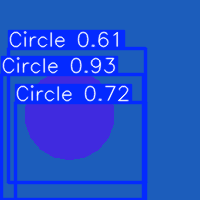

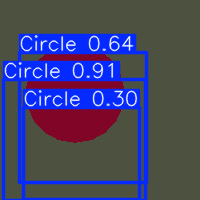

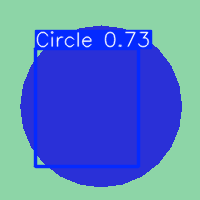

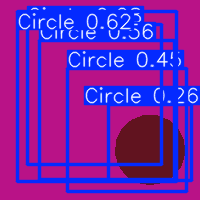

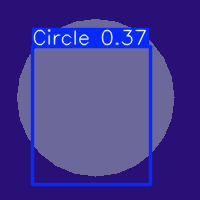

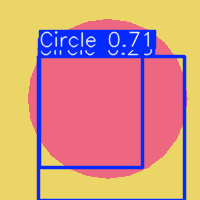

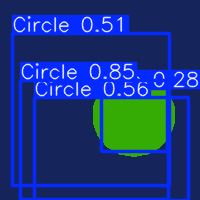

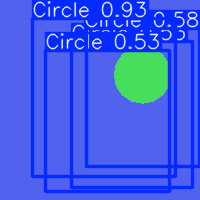

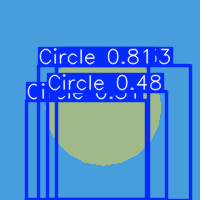

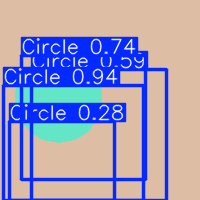

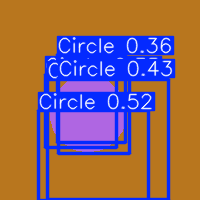

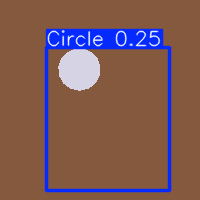

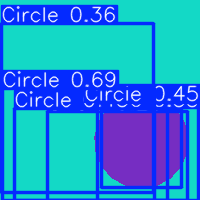

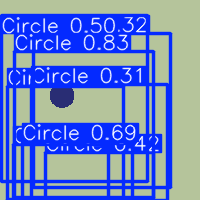

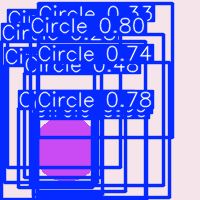

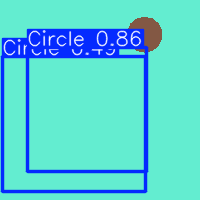

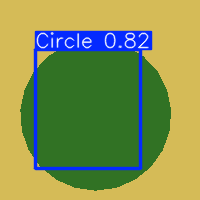

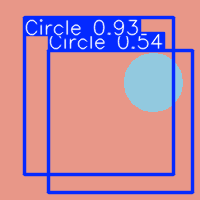

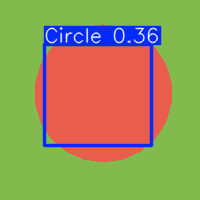

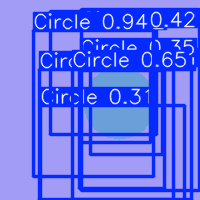

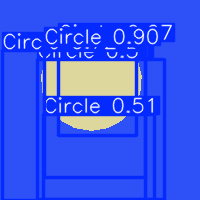

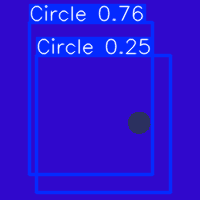

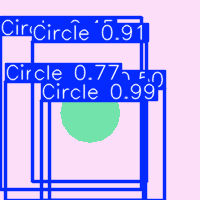

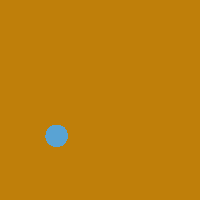

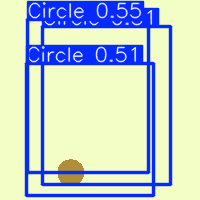

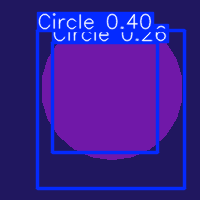

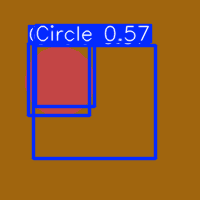

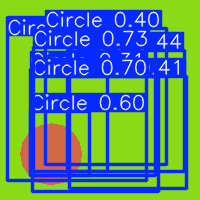

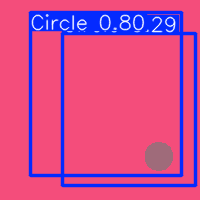

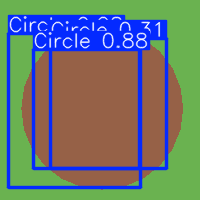

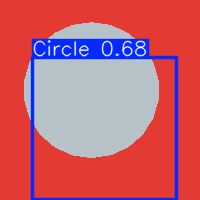

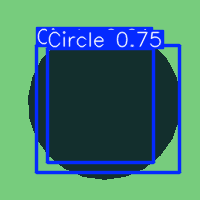

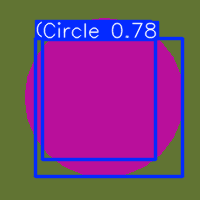

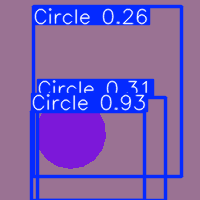

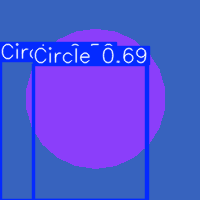

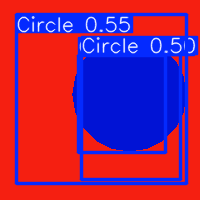

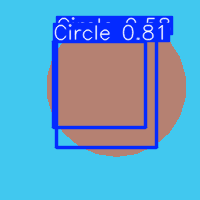

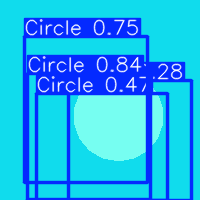

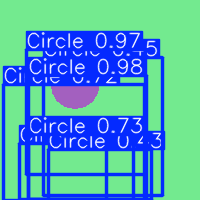

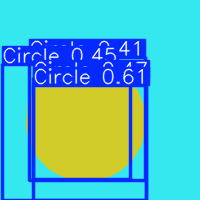

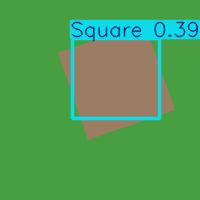

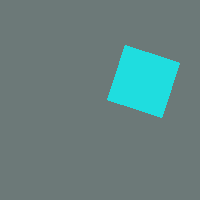

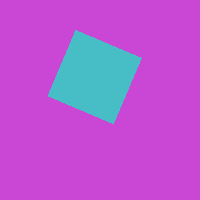

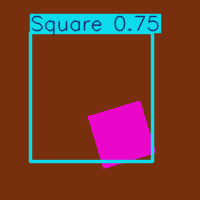

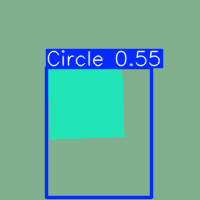

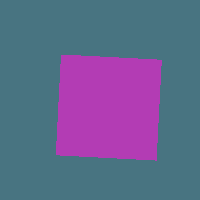

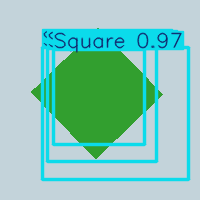

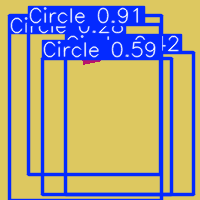

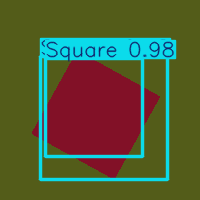

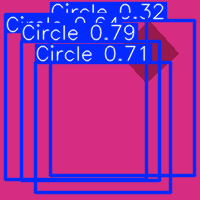

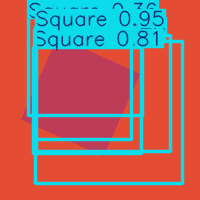

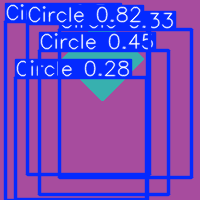

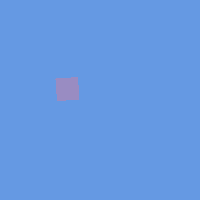

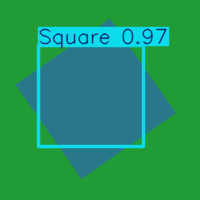

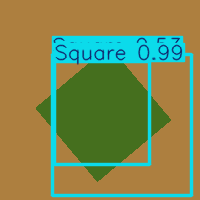

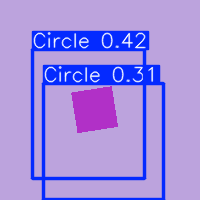

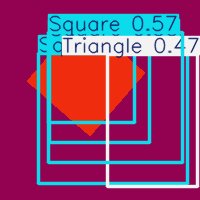

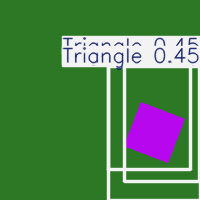

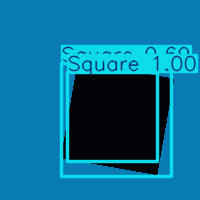

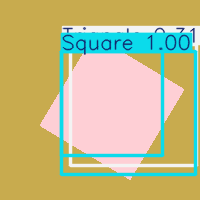

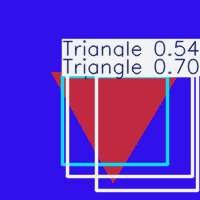

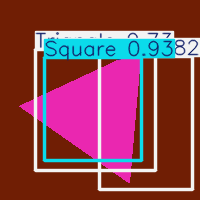

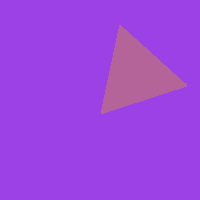

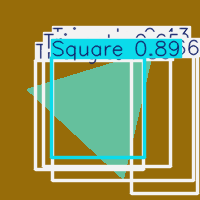

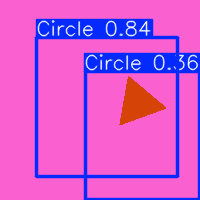

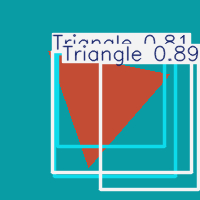

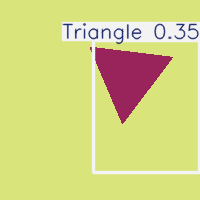

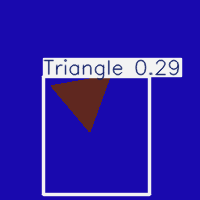

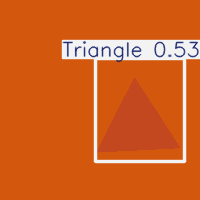

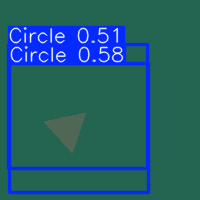

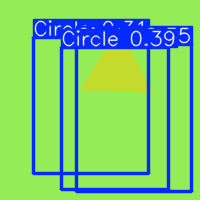

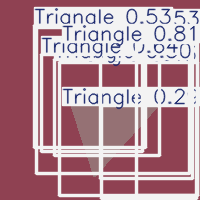

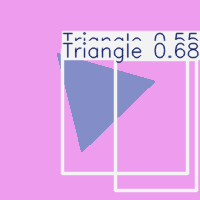

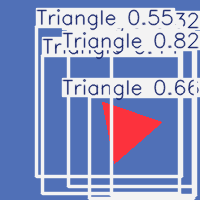

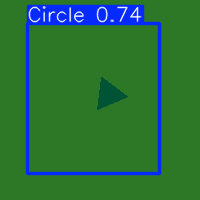

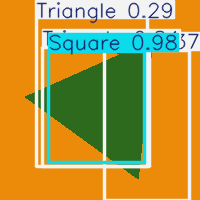

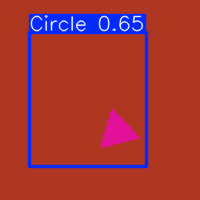

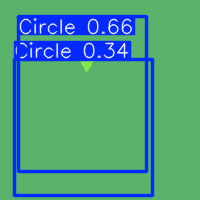

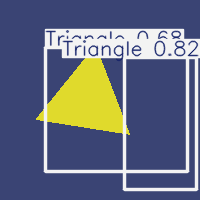

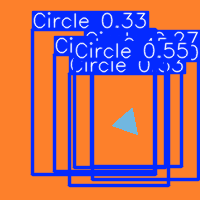

In [10]:
# Fazendo previsões com o modelo YOLO
results = model.predict("/content/drive/MyDrive/geometricshapesdataset_yolo/images/val", save=True)

# Exibindo os resultados
for result in results:
    result.show()  # Exibe cada imagem com as previsões

# Objetivo e Funcionalidades:

Este código tem como objetivo principal treinar um modelo YOLO (You Only Look Once) para a detecção de três formas geométricas (círculo, quadrado e triângulo) em imagens. O código realiza uma série de etapas para preparar o dataset, configurar o modelo, treinar e, finalmente, fazer previsões com o modelo treinado.

EU decidir manter 3 epocas de treinamento com 64X64 pixels em cada imagem para poder ele ter um reconhecimento melhor, apesar de ter alguns erros de identificação, ele já conseuge ter uma boa validação dos dados com as figuras reais. As classificações estão em ingles por conta do dataset ser uma parcela do tamanho original do dataset que foi fornecido pela Kaggle.

Explicação do código:

1. Instalação das bibliotecas necessárias:

O código começa com a instalação de bibliotecas essenciais para a execução do YOLO e manipulação de imagens (ultralytics, opencv-python, numpy, matplotlib).
2. Montagem do Google Drive:

Utiliza a API do Google Colab para montar o Google Drive, permitindo o acesso aos arquivos armazenados lá.
3. Listagem do conteúdo do Drive:

O código lista o conteúdo da pasta MyDrive do Google Drive para verificar se o dataset está no caminho correto.
4. Estrutura do dataset:

Verifica a estrutura do dataset, garantindo que as pastas das imagens estejam corretamente organizadas e que as imagens de cada classe sejam encontradas.
5. Criação de pastas para treino e validação:

Cria as pastas necessárias para separar as imagens de treino e validação, bem como os arquivos de rótulo (labels) correspondentes.
6. Divisão das imagens entre treino e validação:

A função process_images_and_labels() divide as imagens em duas partes: 80% para treino e 20% para validação, e move as imagens para as pastas apropriadas.
7. Geração de rótulos (labels) no formato YOLO:

A função generate_label() cria os arquivos de rótulo no formato exigido pelo YOLO, contendo o índice da classe e as coordenadas normalizadas da caixa delimitadora (neste caso, valores fictícios são usados para a posição e o tamanho da caixa).
8. Treinamento do modelo YOLO:

Configura o arquivo YAML com o caminho do dataset e o número de classes.
O modelo YOLOv5 é carregado e treinado utilizando o dataset dividido entre treino e validação, por 3 épocas e com imagens de tamanho 64x64.
9. Realização de previsões:

O modelo treinado é utilizado para fazer previsões nas imagens de validação, e os resultados (imagens com as previsões) são exibidos.